In [8]:
import os
os.chdir(r"D:\Master\Pattern recognition and machine learning\Abalone Dataset")

In [1]:
%%capture 
%run -n abalone_project.ipynb

### CLASSIFICATION INTO 4 AGE GROUPS (Q)

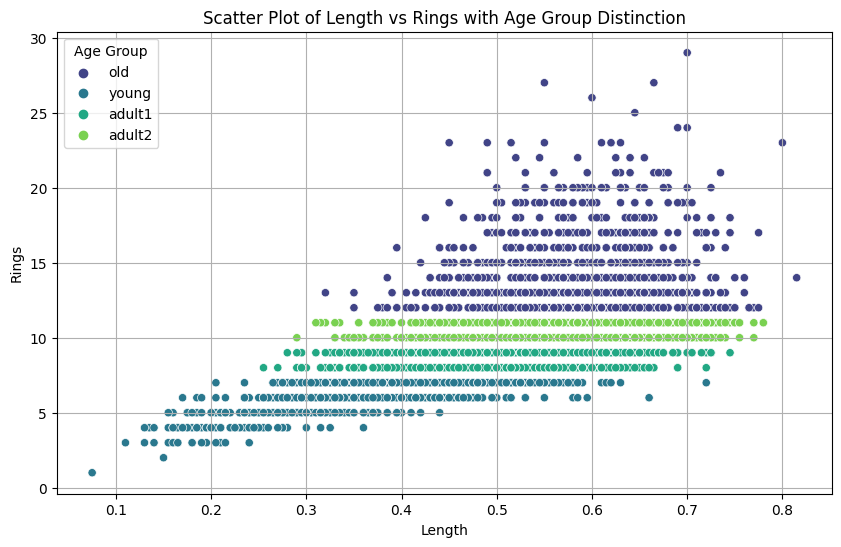

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Length', y='Rings', hue='Age group q', palette='viridis')

plt.title('Scatter Plot of Length vs Rings with Age Group Distinction')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.legend(title='Age Group')
plt.grid(True)

# Show plot
plt.show()

# Srediti outliere

In [3]:
X = data[['Length']]
y = data['Age group q']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Function that uses k-nn to calculate the pdf of x in the given sample

def pdf(x, k, sample): 
    distances = sorted([abs(x-s) for s in sample])
    dist = distances[k-1]
    vol_unit_sphere = 2
    return k / (len(sample) * vol_unit_sphere * dist)


# Function that classifies x according to knn-pdf function and ML criteria:

def classify_point(x, k):
    pdf1 = pdf(x, k, X_train[y_train == 'young']['Length']) 
    pdf2 = pdf(x, k, X_train[y_train == 'adult1']['Length']) 
    pdf3 = pdf(x, k, X_train[y_train == 'adult2']['Length'])
    pdf4 = pdf(x, k, X_train[y_train == 'old']['Length'])

    if pdf1 == max(pdf1, pdf2, pdf3, pdf4):
        return 'young'
    elif pdf2 == max(pdf1, pdf2, pdf3, pdf4):
        return 'adult1'
    elif pdf3 == max(pdf1, pdf2, pdf3, pdf4):
        return 'adult2'
    else: return 'old'

def error_of_classifier(assigned_label, true_label):
    return 0 if assigned_label == true_label else 1

# Run the model and evaluate: 
# Previse ostra metrika, trebalo bi koristiti MAE

err=0
k=50
for idx, sample in enumerate(X_test['Length']):
    classified_label = classify_point(sample, k)
    true_label = y_test.iloc[idx]  
    err += error_of_classifier(classified_label, true_label)

# Calculate the average error
average_error = err / len(X_test)
print(average_error) # 56% pogresno klasifikovanih

0.5633971291866029


### CLASSIFICATION INTO 3 AGE GROUPS

In [4]:
# Sve to isto sa Age group (3 grupe)

X = data[['Length']]
y = data['Age group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Function that classifies x according to knn-pdf function and ML criteria:


def classify_point(x, k):
    pdf1 = pdf(x, k, X_train[y_train == 'young']['Length']) 
    pdf2 = pdf(x, k, X_train[y_train == 'adult']['Length']) 
    pdf3 = pdf(x, k, X_train[y_train == 'old']['Length'])

    if pdf1 == max(pdf1, pdf2, pdf3):
        return 'young'
    elif pdf2 == max(pdf1, pdf2, pdf3):
        return 'adult1'
    else: return 'old'


# Function that decides whether it is a good classification or not (0 right, 1 wrong):

def error_of_classifier(assigned_label, true_label):
    return 0 if assigned_label == true_label else 1


# Run the model and evaluate: 

err=0
k = 50
for idx, sample in enumerate(X_test['Length']):
    classified_label = classify_point(sample, k)
    true_label = y_test.iloc[idx]  
    err += error_of_classifier(classified_label, true_label)

# Calculate the average error
average_error = err / len(X_test)
print(average_error) # 54%, 2% bolje nego sa 4 grupe

0.5430622009569378


### K-NN REGRESSION - PREDICTION IS THE MEAN OF K-NN

In [5]:
X = data[['Length']]
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def knn_regression(x, k):

    distances = np.abs(X_train['Length'] - x)
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_y_train = y_train.iloc[k_nearest_indices]
   
    prediction = k_nearest_y_train.mean()
    
    return prediction.round()

y_pred = []

k=57
for idx, sample in enumerate(X_test['Length']):
     y_pred.append(knn_regression(sample,k))

r2 = r2_score(y_test, y_pred) # 0.32 
mae = mean_absolute_error(y_test, y_pred) # 1.93
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2, 'MAE:', mae, 'MSE:', mse)

# Uradi sa vise dimenzija


R2 score: 0.3191066624934441 MAE: 1.9043062200956937 MSE: 7.3708133971291865


In [27]:
X = data.drop(columns=['Sex', 'Rings', 'Age group', 'Age group q'])
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def knn_regression(x, k):
    
    distances = np.sqrt(((X_train - x) ** 2).sum(axis=1))
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_y_train = y_train.iloc[k_nearest_indices]
   
    prediction = k_nearest_y_train.mean()
    
    return prediction.round()

y_pred = []

k=58
for idx, sample in X_test.iterrows(): 
    y_pred.append(knn_regression(sample, k))

r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2, 'MAE:', mae, 'MSE:', mse)

R2 score: 0.5350212326797165 MAE: 1.514354066985646 MSE: 5.033492822966507
